### **COMPUTER VISION - ASSIGNMENT 2**
SADWI KANDULA


### **Problem 1 - Hough Transform**

170498071/170498071 [==============================] - 11s 0us/step


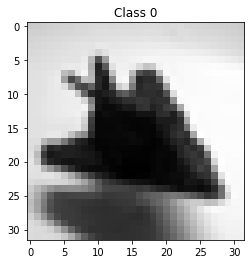

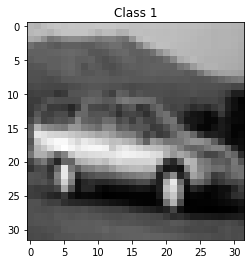

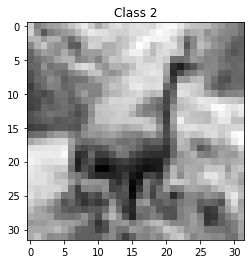

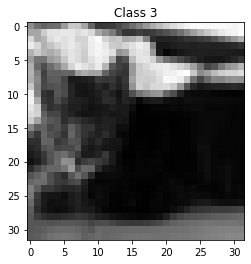

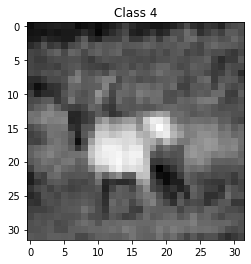

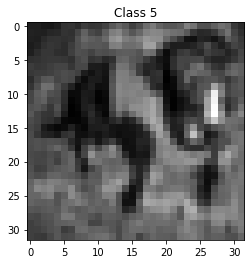

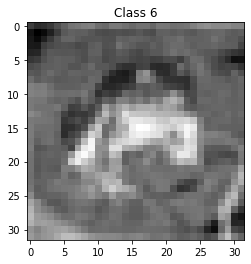

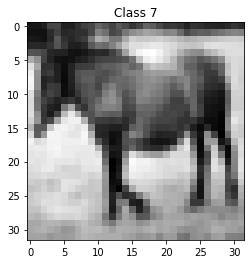

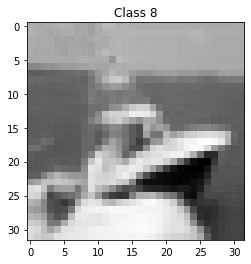

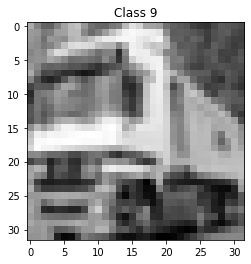

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select any 10 images from CIFAR-10 dataset such that all 10 classes are represented
selected_images = []
for i in range(10):
    selected_images.append(x_train[y_train.flatten() == i][0])

# Iterate over the selected images
for i, image in enumerate(selected_images):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, 50, 150)

    # Apply Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

    # Check if lines are detected
    if lines is not None:
        # Iterate over the lines and draw them on the image
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(gray_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Display the image using matplotlib
    plt.imshow(gray_image, cmap='gray')
    plt.title("Class {}".format(i))
    plt.show()

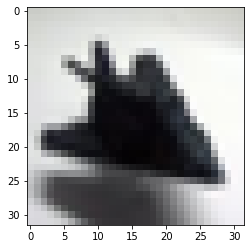

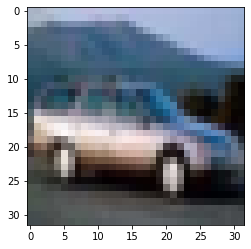

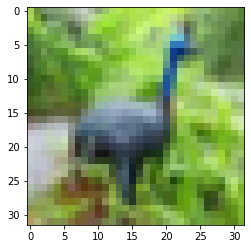

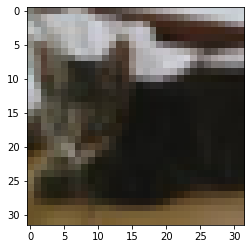

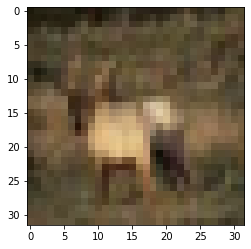

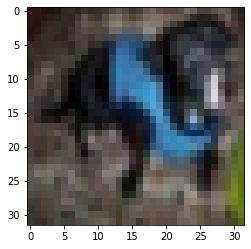

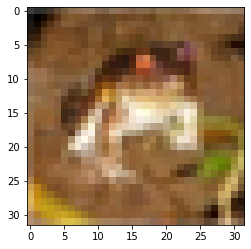

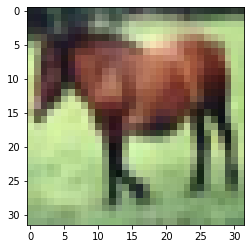

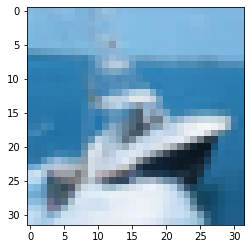

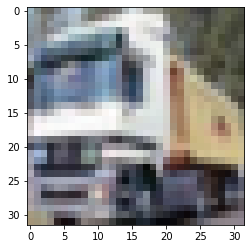

In [ ]:


# Iterate over the selected images
for image in selected_images:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Circle Detection Hough Transform
    circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    
    # Draw the detected circles on the image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # Display the image with the detected circles
    plt.imshow(image)
    plt.show()

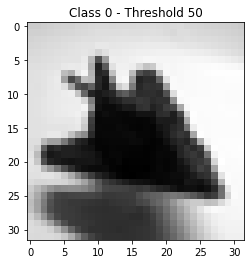

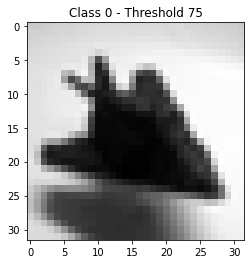

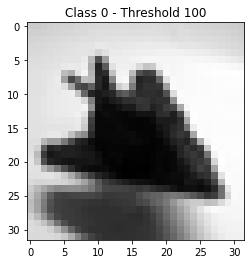

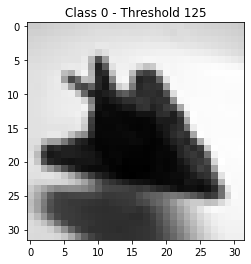

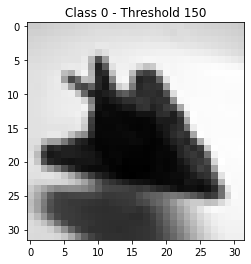

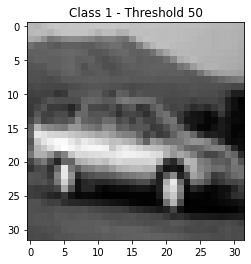

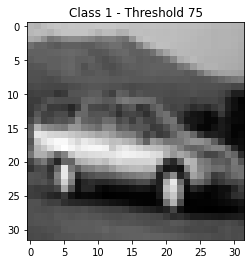

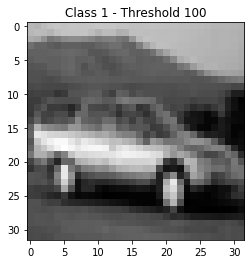

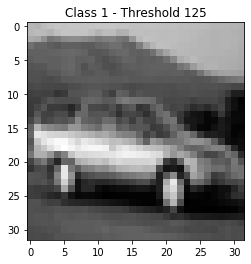

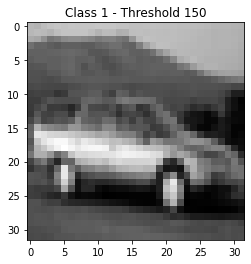

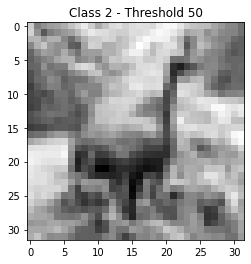

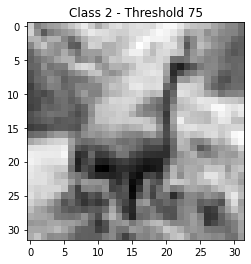

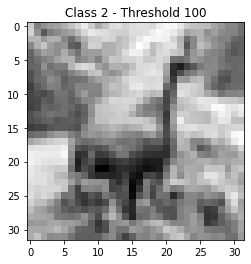

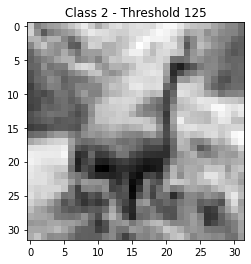

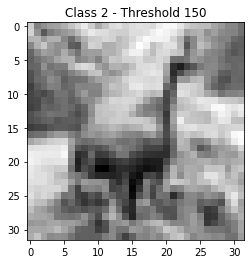

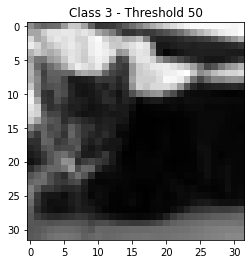

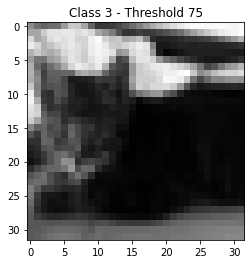

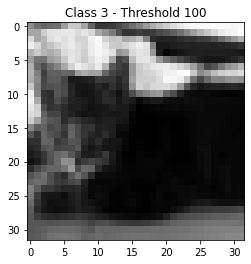

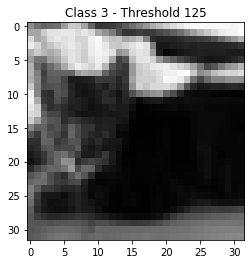

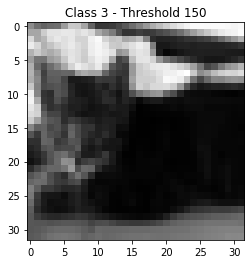

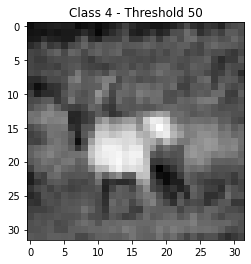

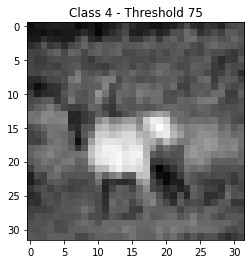

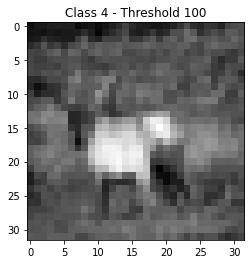

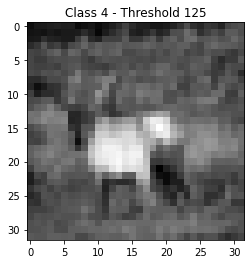

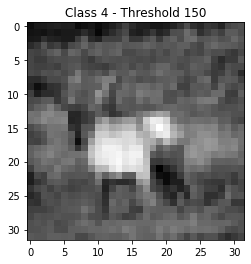

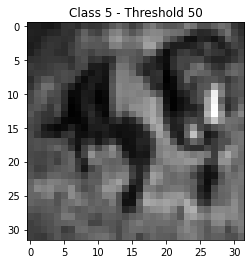

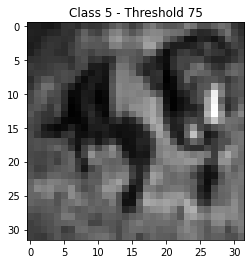

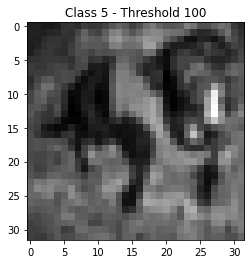

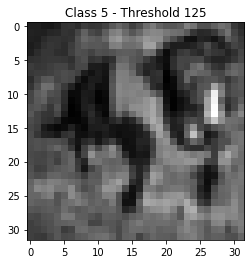

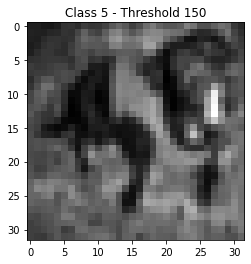

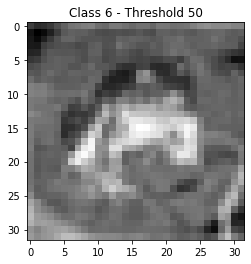

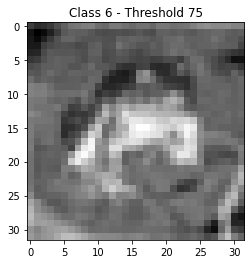

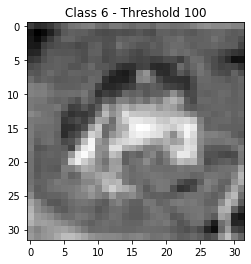

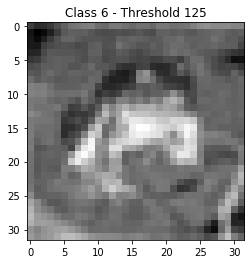

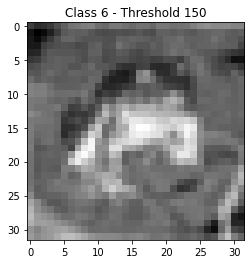

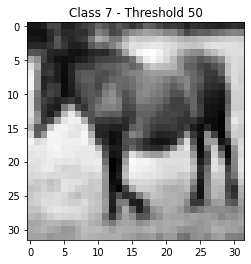

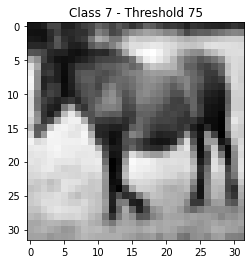

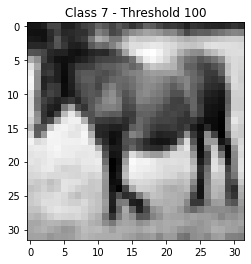

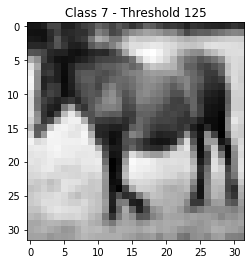

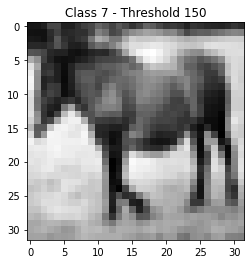

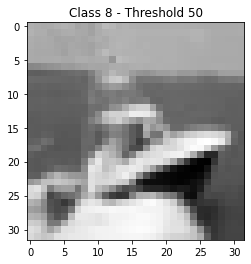

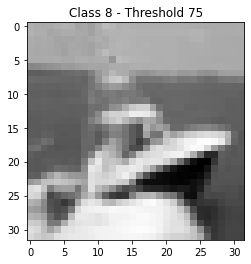

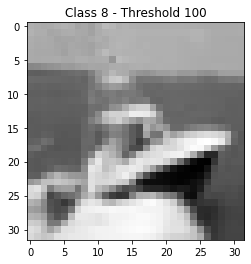

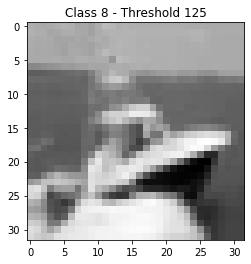

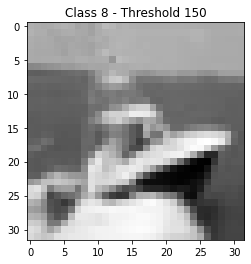

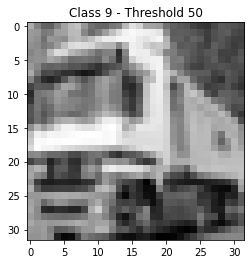

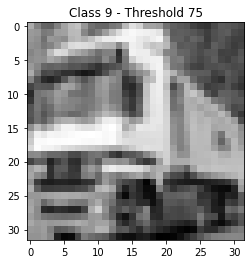

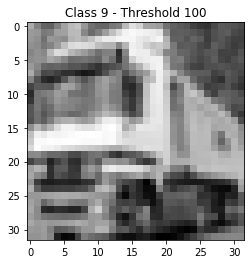

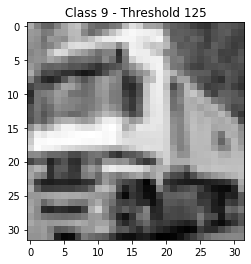

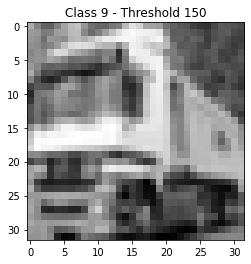

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select any 10 images from CIFAR-10 dataset such that all 10 classes are represented
selected_images = []
for i in range(10):
    selected_images.append(x_train[y_train.flatten() == i][0])

# Define different threshold values to study the effect
threshold_values = [50, 75, 100, 125, 150]

# Iterate over the selected images
for i, image in enumerate(selected_images):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, 50, 150)

    # Iterate over the threshold values
    for threshold in threshold_values:
        # Apply Hough Line Transform
        lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)

        # Check if lines are detected
        if lines is not None:
            # Iterate over the lines and draw them on the image
            for line in lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(gray_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
        # Display the image using matplotlib
        plt.imshow(gray_image, cmap='gray')
        plt.title("Class {} - Threshold {}".format(i, threshold))
        plt.show()


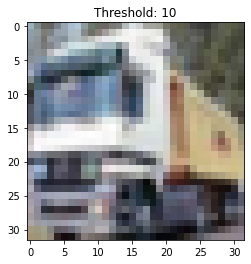

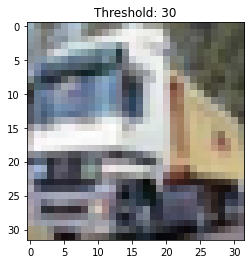

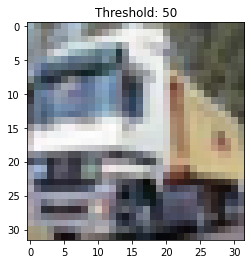

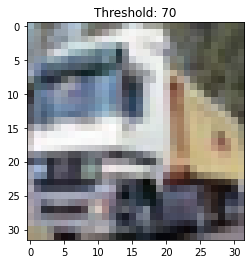

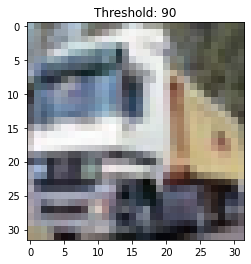

In [ ]:
# Apply Circle Detection Hough Transform with different threshold values
for threshold in [10, 30, 50, 70, 90]:
    circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, 20, param1=threshold, param2=30, minRadius=0, maxRadius=0)
    
    # Draw the detected circles on the image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # Display the image with the detected circles
    plt.imshow(image)
    plt.title("Threshold: {}".format(threshold))
    plt.show()


In [ ]:
#Parameters for Hough Line Transform
rho = 1 # Distance resolution of the accumulator in pixels
theta = np.pi / 180 # Angle resolution of the accumulator in radians
threshold = 100 # Accumulator threshold parameter, only those lines are returned that get enough votes
min_line_length = 100 # Minimum line length
max_line_gap = 10 # Maximum allowed gap between points on the same line to link them

#Parameters for Hough Circle Transform
dp = 1 # Inverse ratio of the accumulator resolution
min_dist = 20 # Minimum distance between the center of detected circles
param1 = 50 # First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector
param2 = 30 # Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage
min_radius = 0 # Minimum circle radius
max_radius = 0 # Maximum circle radius

### **Problem 2 - SIFT Feature detector and descriptor**

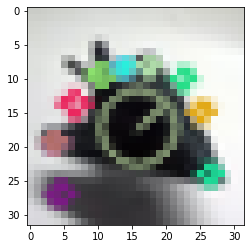

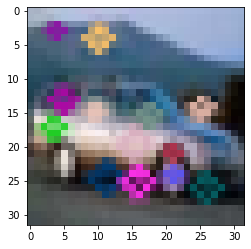

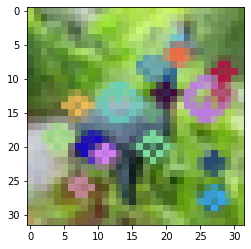

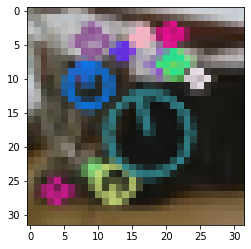

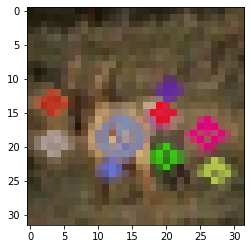

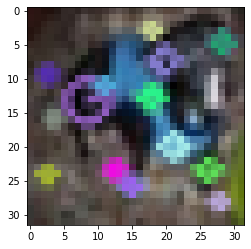

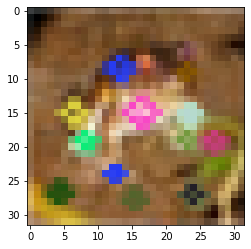

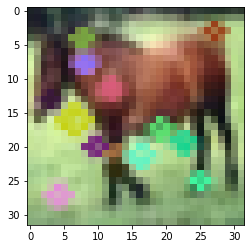

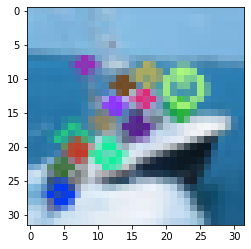

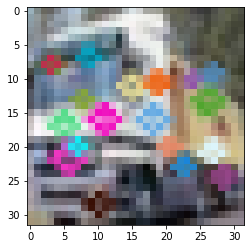

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select any 10 images from CIFAR-10 dataset such that all 10 classes are represented
selected_images = []
for i in range(10):
    image = x_train[y_train.flatten() == i][0]
    selected_images.append(image)

# Create SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Iterate over the selected images
for image in selected_images:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Detect keypoints and compute descriptor using SIFT
    keypoints, descriptor = sift.detectAndCompute(gray_image, None)
    
    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the image with the detected keypoints
    plt.imshow(image_with_keypoints)
    plt.show()

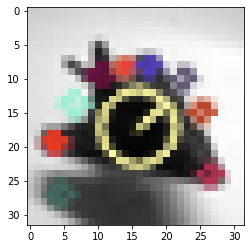

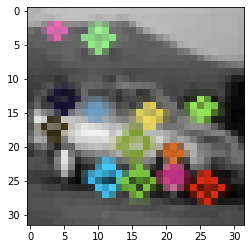

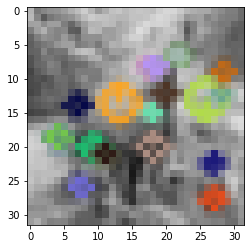

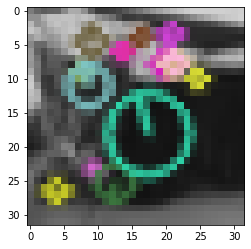

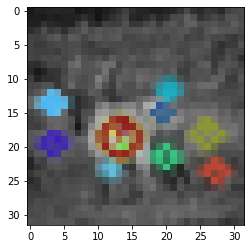

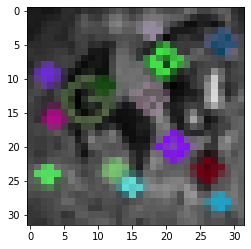

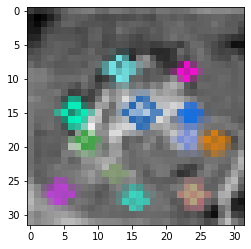

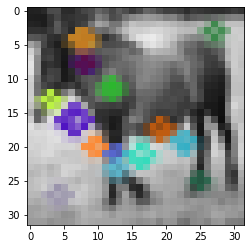

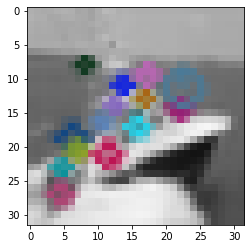

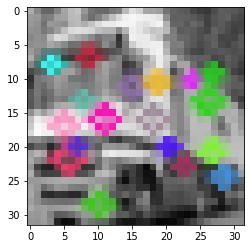

In [ ]:
# Select any 10 images from CIFAR-10 dataset such that all 10 classes are represented
selected_images = []
for i in range(10):
    image = x_train[y_train.flatten() == i][0]
    selected_images.append(image)

for img in selected_images:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Detect keypoints
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    # Draw keypoints on the image
    img_keypoints = cv2.drawKeypoints(gray_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # Show the image with keypoints
    plt.imshow(img_keypoints)
    plt.show()

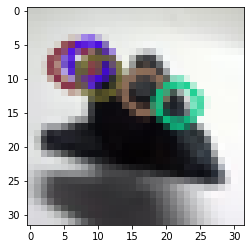

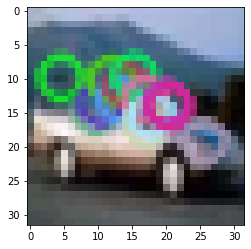

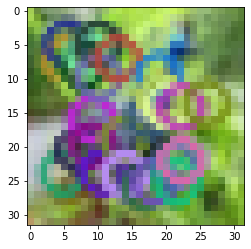

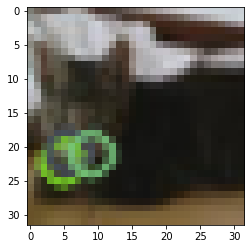

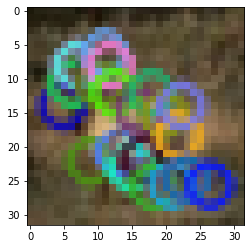

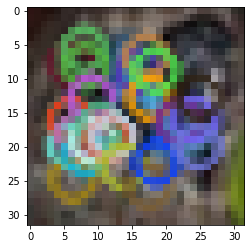

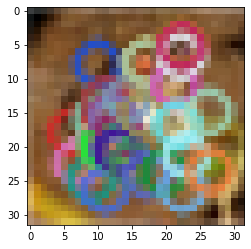

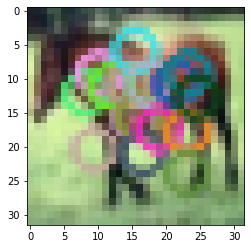

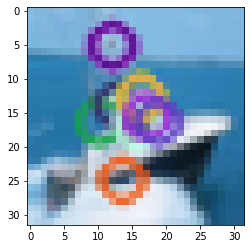

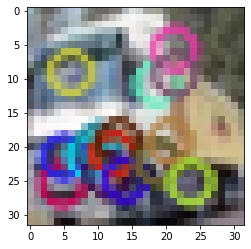

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Select any 10 images from CIFAR-10 dataset such that all 10 classes are represented
selected_images = []
for i in range(10):
    image = x_train[y_train.flatten() == i][0]
    selected_images.append(image)

for img in selected_images:
# Read an image

  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Create a SIFT object with a specific sigma value
  sift = cv2.xfeatures2d.SIFT_create(sigma=0.4)

# Detect keypoints in the image
  keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw the keypoints on the image
  img_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Show the image with keypoints
  plt.imshow(img_keypoints)
  plt.show()



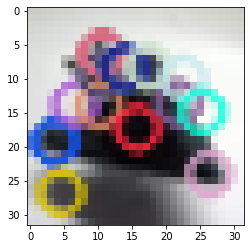

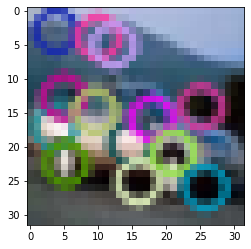

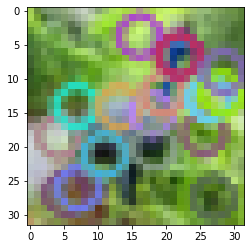

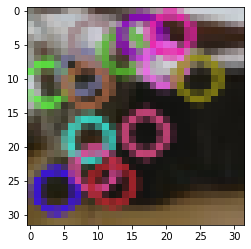

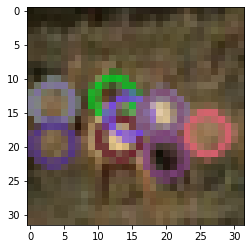

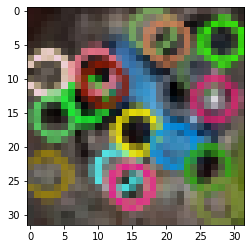

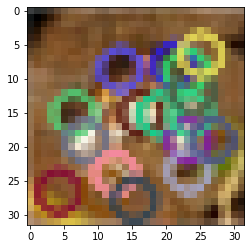

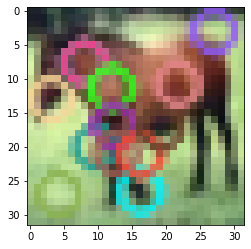

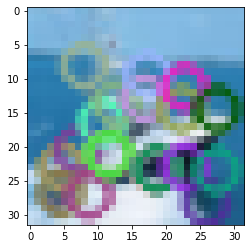

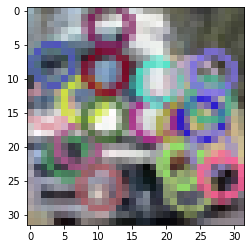

In [ ]:
for img in selected_images:
# Read an image

  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Create a SIFT object with 1.5 as sigma value
  sift = cv2.xfeatures2d.SIFT_create(sigma=1.5)

# Detect keypoints in the image
  keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw the keypoints on the image
  img_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Show the image with keypoints
  plt.imshow(img_keypoints)
  plt.show()